In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

print("Kütüphaneler yüklendi! ✅")

Kütüphaneler yüklendi! ✅


In [9]:

FILE_PATH = "world_happiness_report.csv"

try:
    df = pd.read_csv(FILE_PATH)
    
   
    df = df.dropna(subset=['Happiness Score'])
    
    print("Veri başarıyla yüklendi ve temizlendi. ✅")
    print(f"Toplam Ülke Sayısı: {len(df)}")
    
except FileNotFoundError:
    print(f"HATA: '{FILE_PATH}' dosyası bulunamadı. Lütfen dosya adını kontrol et.")

Veri başarıyla yüklendi ve temizlendi. ✅
Toplam Ülke Sayısı: 315


In [5]:
selected_columns = [
    'Country',
    'Region',
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Generosity',
    'Trust (Government Corruption)'
]

analysis_df = df[selected_columns].copy()

analysis_df.columns = [
    'Country',
    'Region',
    'Happiness Score',
    'Economy (GDP)',
    'Social Support',
    'Health',
    'Freedom',
    'Generosity',
    'Corruption'
]

analysis_df.head()

,Country,Region,Happiness Score,Economy (GDP),Social Support,Health,Freedom,Generosity,Corruption
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


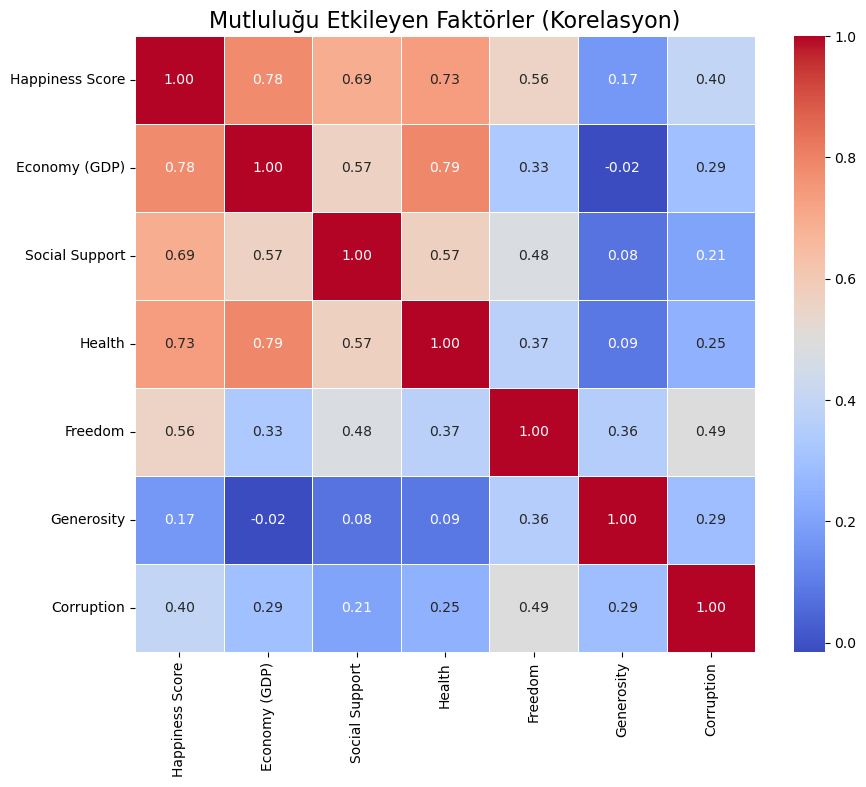

In [6]:

numeric_df = analysis_df.drop(columns=['Country', 'Region'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mutluluğu Etkileyen Faktörler (Korelasyon)', fontsize=16)
plt.show()

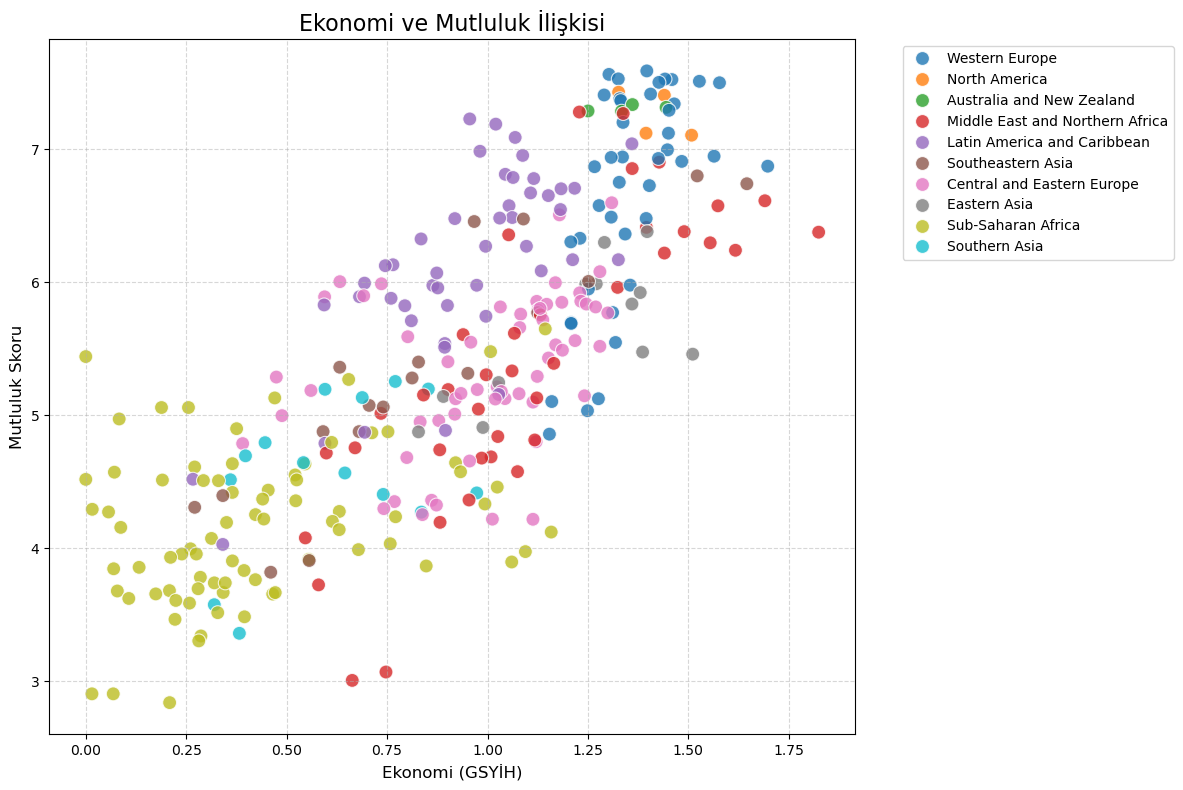

In [7]:
plt.figure(figsize=(12, 8))


sns.scatterplot(
    data=analysis_df, 
    x='Economy (GDP)', 
    y='Happiness Score', 
    hue='Region',  
    s=100,         
    alpha=0.8    
)

plt.title('Ekonomi ve Mutluluk İlişkisi', fontsize=16)
plt.xlabel('Ekonomi (GSYİH)', fontsize=12)
plt.ylabel('Mutluluk Skoru', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 

plt.tight_layout()
plt.show()

In [8]:
print("--- 🏆 EN MUTLU 5 ÜLKE ---")
print(analysis_df[['Country', 'Happiness Score']].head(5))

print("\n--- 😢 EN MUTSUZ 5 ÜLKE ---")

print(analysis_df[['Country', 'Happiness Score']].sort_values(by='Happiness Score', ascending=True).head(5))

--- 🏆 EN MUTLU 5 ÜLKE ---
       Country  Happiness Score
0  Switzerland            7.587
1      Iceland            7.561
2      Denmark            7.527
3       Norway            7.522
4       Canada            7.427

--- 😢 EN MUTSUZ 5 ÜLKE ---
     Country  Happiness Score
157     Togo            2.839
314  Burundi            2.905
156  Burundi            2.905
155    Syria            3.006
313    Syria            3.069
